In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import re
import plotly.express as px
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/Mining-BTC-180.csv")

In [4]:
df.head()

,Unnamed: 0,Date,Number-transactions,Output-volume(BTC),Market-price,Hash-rate,Cost-per-trans-USD,Mining-revenue-USD,Transaction-fees-BTC
0,0,2017-04-29 00:00:00,341319,4488916,3119179,4488916,9,3119179,256
1,1,2017-04-30 00:00:00,281489,3918072,2720216,3918072,10,2720216,199
2,2,2017-05-01 00:00:00,294786,3892124,2878278,3892124,10,2878278,228
3,3,2017-05-02 00:00:00,333161,4099704,3149553,4099704,10,3149553,273
4,4,2017-05-03 00:00:00,295149,3425069,2760373,3425069,10,2760373,247


In [9]:
df.columns

Index(['Unnamed: 0', 'Date', 'Number-transactions', 'Output-volume(BTC)',
       'Market-price', 'Hash-rate', 'Cost-per-trans-USD', 'Mining-revenue-USD',
       'Transaction-fees-BTC'],
      dtype='object')

In [7]:
hashrate_df = create_hist_df(df, "Hash-rate")

In [8]:
hashrate_df

,index,Hash-rate,index_str
6,"(3338973.114, 4172615.6]",13,"(3338973.114, 4172615.6]"
0,"(4172615.6, 4998004.2]",37,"(4172615.6, 4998004.2]"
2,"(4998004.2, 5823392.8]",29,"(4998004.2, 5823392.8]"
1,"(5823392.8, 6648781.4]",32,"(5823392.8, 6648781.4]"
4,"(6648781.4, 7474170.0]",20,"(6648781.4, 7474170.0]"
3,"(7474170.0, 8299558.6]",22,"(7474170.0, 8299558.6]"
5,"(8299558.6, 9124947.2]",13,"(8299558.6, 9124947.2]"
8,"(9124947.2, 9950335.8]",5,"(9124947.2, 9950335.8]"
7,"(9950335.8, 10775724.4]",6,"(9950335.8, 10775724.4]"
9,"(10775724.4, 11601113.0]",2,"(10775724.4, 11601113.0]"


In [6]:
def create_hist_df(df, col_name, bins = 10):
    df_cut = pd.cut(df[col_name], bins = bins)
    df_value_count = df_cut.value_counts()
    df_hist = pd.DataFrame(df_value_count)
    df_hist = df_hist.reset_index()
    df_hist['index_str'] = df_hist['index'].apply(str)
    df_sort = df_hist.sort_values('index')
    return df_sort

In [12]:
plotly_subplot = []

In [14]:
count = 1
for columns in df.columns:
    # check if numeric 
    if is_numeric_dtype(df[columns]):
        df_hist = create_hist_df(df, columns)
        subplot = go.Bar(x = df_hist['index_str'], y = df_hist[columns])
        count+=1 
        plotly_subplot.append(subplot)


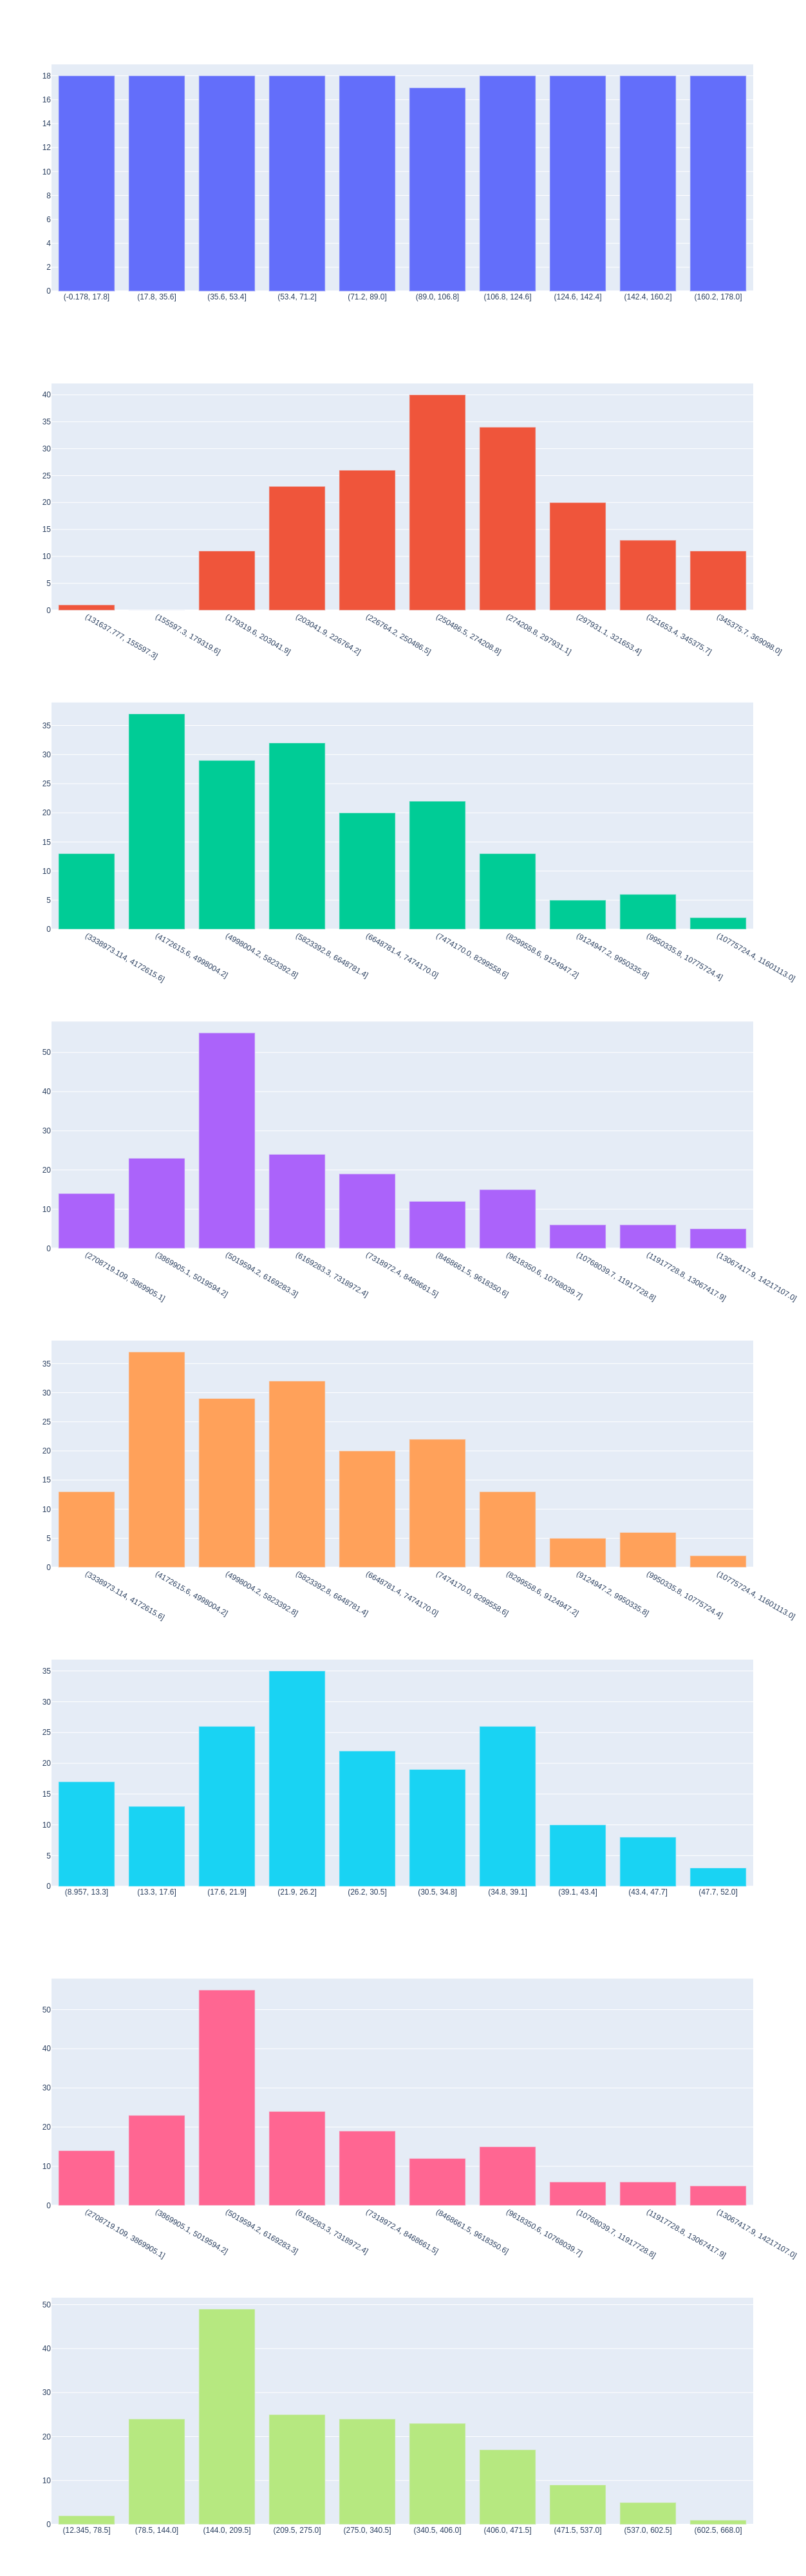

In [19]:
total_plot = count - 1
plot = make_subplots(cols = 1, rows = total_plot)
for index, trace in enumerate(plotly_subplot):
    plot.add_trace(trace, col = 1, row = index + 1)
plot.update_layout(height=500 * total_plot, showlegend=False)
plot.show()

In [32]:
?go.Histogram

Init signature:
go.Histogram(
    arg=None,
    alignmentgroup=None,
    autobinx=None,
    autobiny=None,
    bingroup=None,
    cumulative=None,
    customdata=None,
    customdatasrc=None,
    error_x=None,
    error_y=None,
    histfunc=None,
    histnorm=None,
    hoverinfo=None,
    hoverinfosrc=None,
    hoverlabel=None,
    hovertemplate=None,
    hovertemplatesrc=None,
    hovertext=None,
    hovertextsrc=None,
    ids=None,
    idssrc=None,
    legendgroup=None,
    marker=None,
    meta=None,
    metasrc=None,
    name=None,
    nbinsx=None,
    nbinsy=None,
    offsetgroup=None,
    opacity=None,
    orientation=None,
    selected=None,
    selectedpoints=None,
    showlegend=None,
    stream=None,
    text=None,
    textsrc=None,
    uid=None,
    uirevision=None,
    unselected=None,
    visible=None,
    x=None,
    xaxis=None,
    xbins=None,
    xcalendar=None,
    xsrc=None,
    y=None,
    yaxis=None,
    ybins=None,
    ycalendar=None,
    ysrc=None,
    **kwargs,
)

In [37]:
plotly_subplot_hist = []
title_list = []
count = 1
for columns in df.columns:
    # check if numeric 
    if is_numeric_dtype(df[columns]):
        # df_hist = create_hist_df(df, columns)
        # subplot = go.Bar(x = df_hist['index_str'], y = df_hist[columns])
        subplot = go.Histogram(x = df[columns], nbinsx = 100)
        count+=1 
        plotly_subplot_hist.append(subplot)
        title_list.append(columns)
        

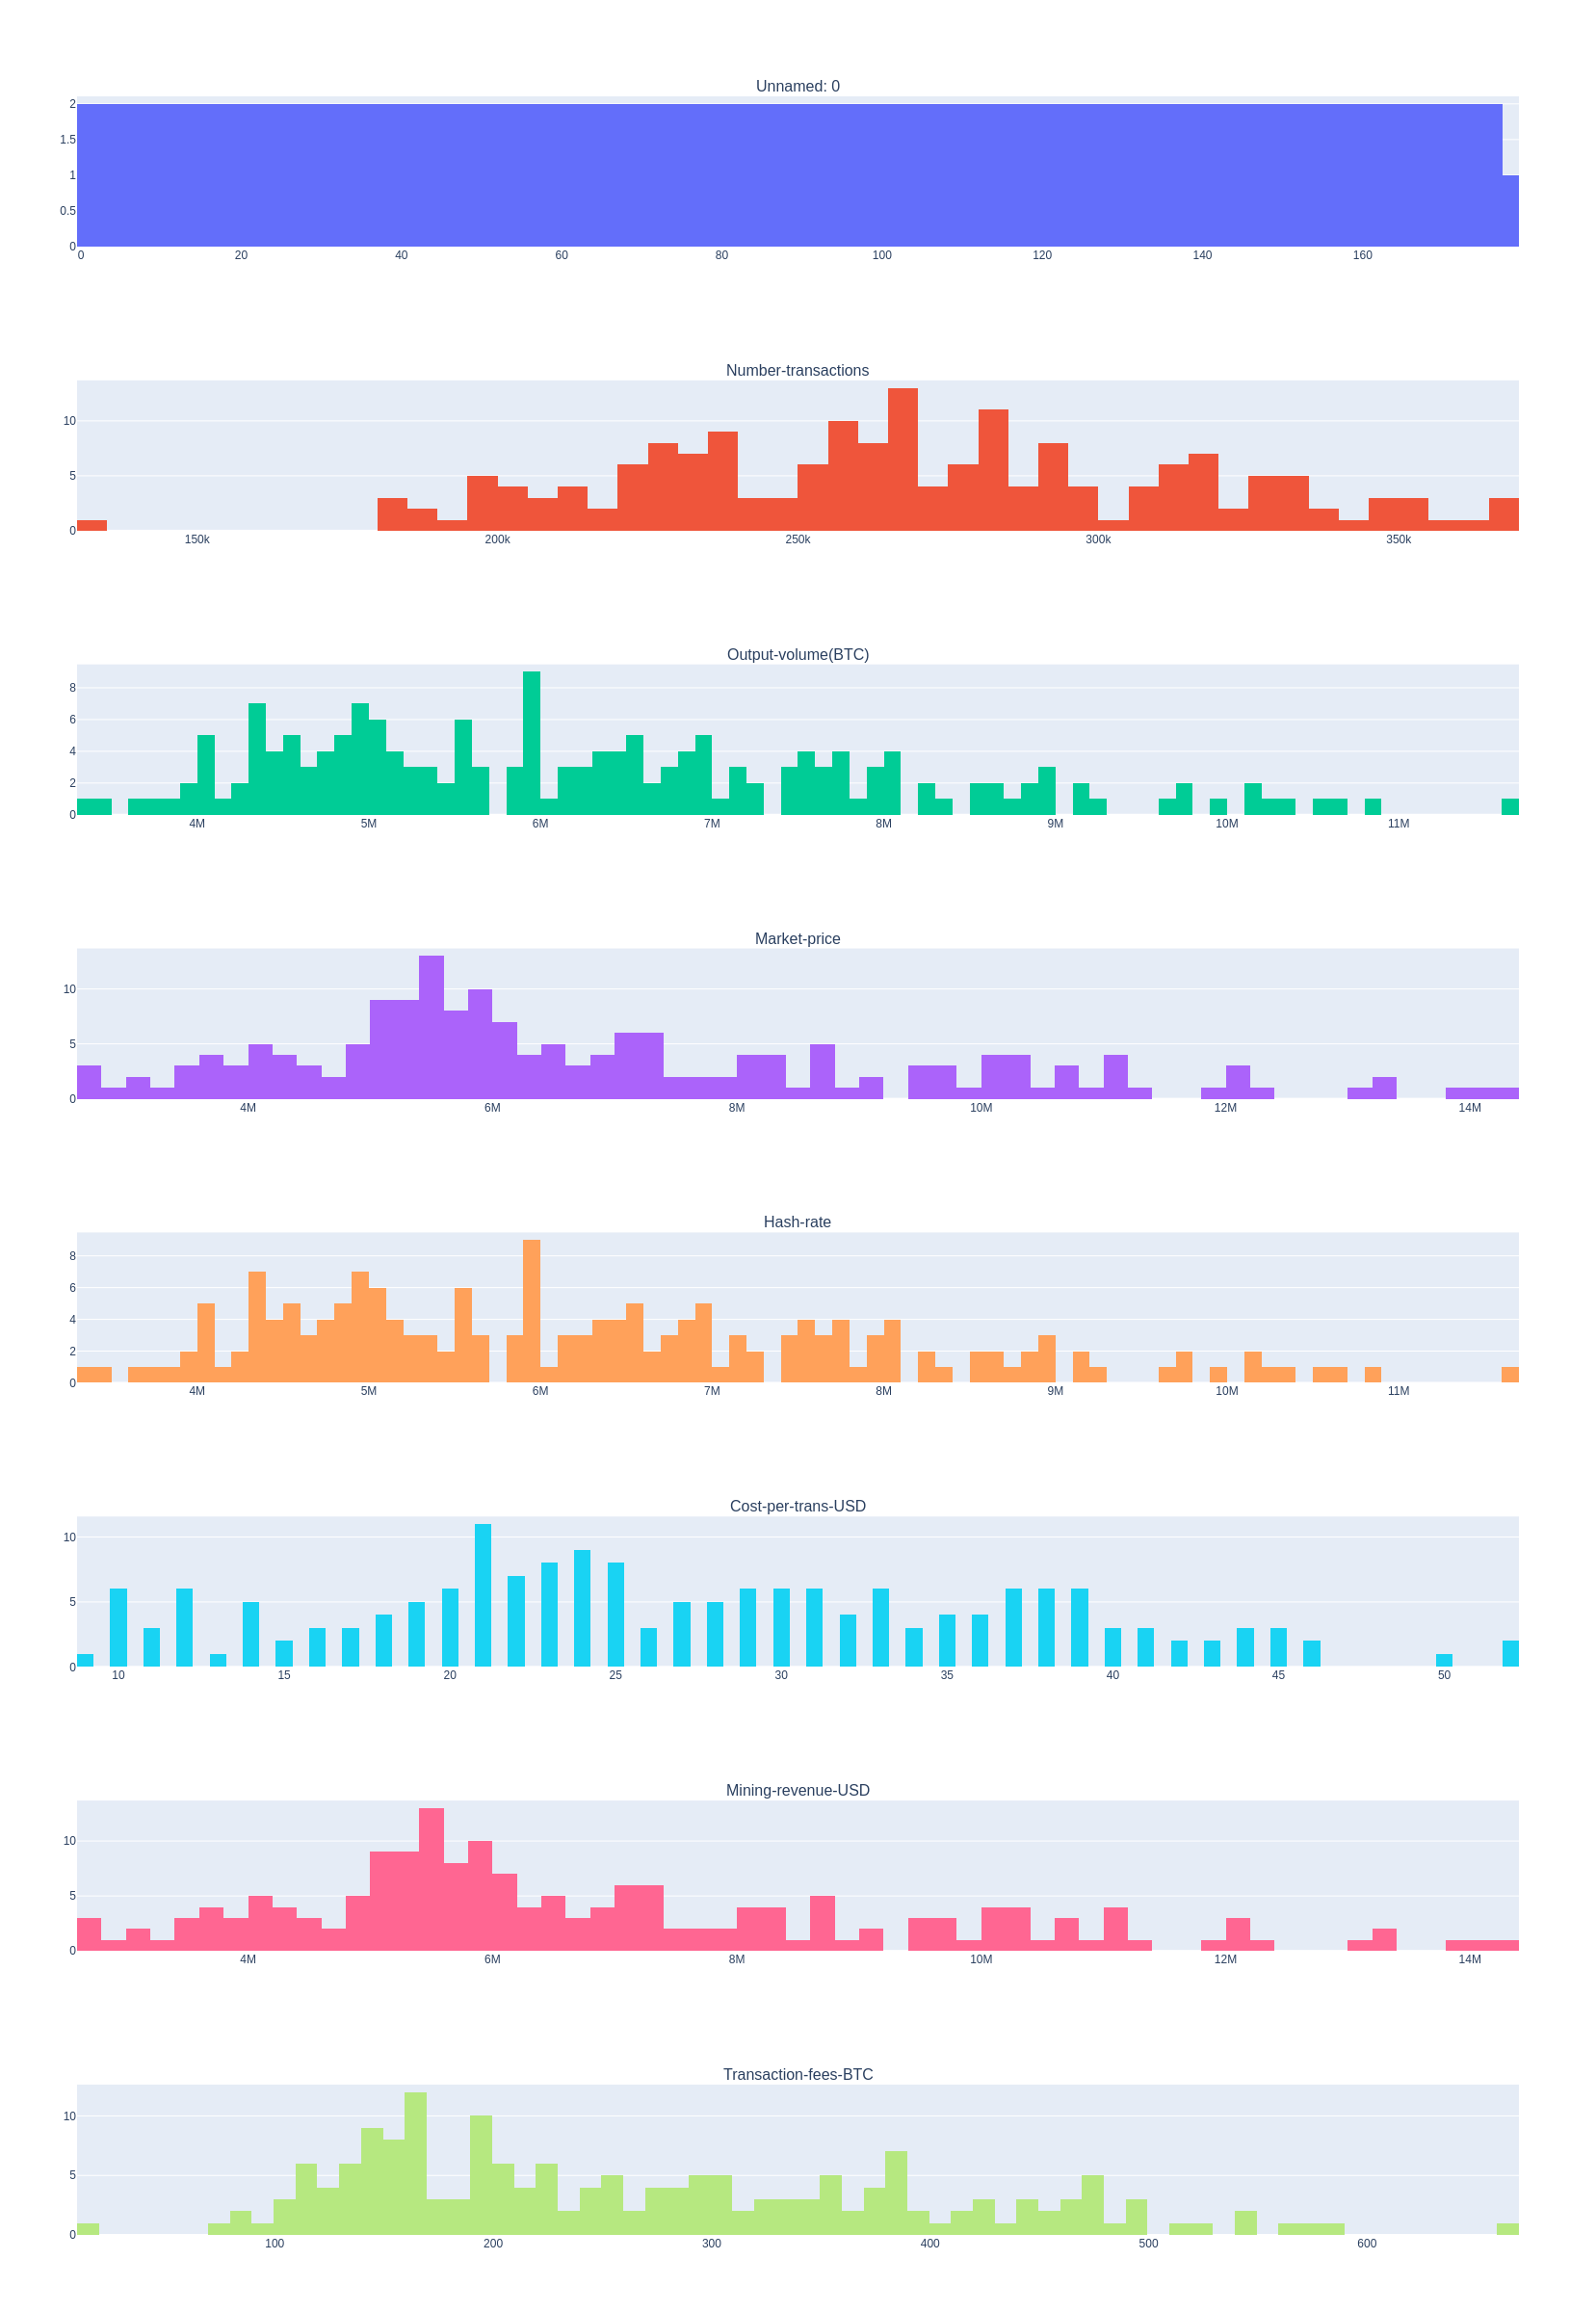

In [44]:
total_plot = count - 1
plot = make_subplots(cols = 1, rows = total_plot, subplot_titles=title_list)
for index, trace in enumerate(plotly_subplot_hist):
    plot.add_trace(trace, col = 1, row = index + 1)
plot.update_layout(height=300 * total_plot, width=1000, showlegend=False)
plot.show()

In [45]:
def plot_histogram_numerical(df):
    plotly_subplot_hist = []
    title_list = []
    count = 1
    for columns in df.columns:
        if is_numeric_dtype(df[columns]):
            subplot = go.Histogram(x = df[columns], nbinsx = 100)
            count+=1 
            plotly_subplot_hist.append(subplot)
            title_list.append(columns)
    
    total_plot = count - 1
    plot = make_subplots(cols = 1, rows = total_plot, subplot_titles=title_list)
    for index, trace in enumerate(plotly_subplot_hist):
        plot.add_trace(trace, col = 1, row = index + 1)
    plot.update_layout(height=300 * total_plot, width=1000, showlegend=False)
    return plot

In [47]:
df_titanic = pd.read_csv("dataset/titanic/train.csv")

In [48]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


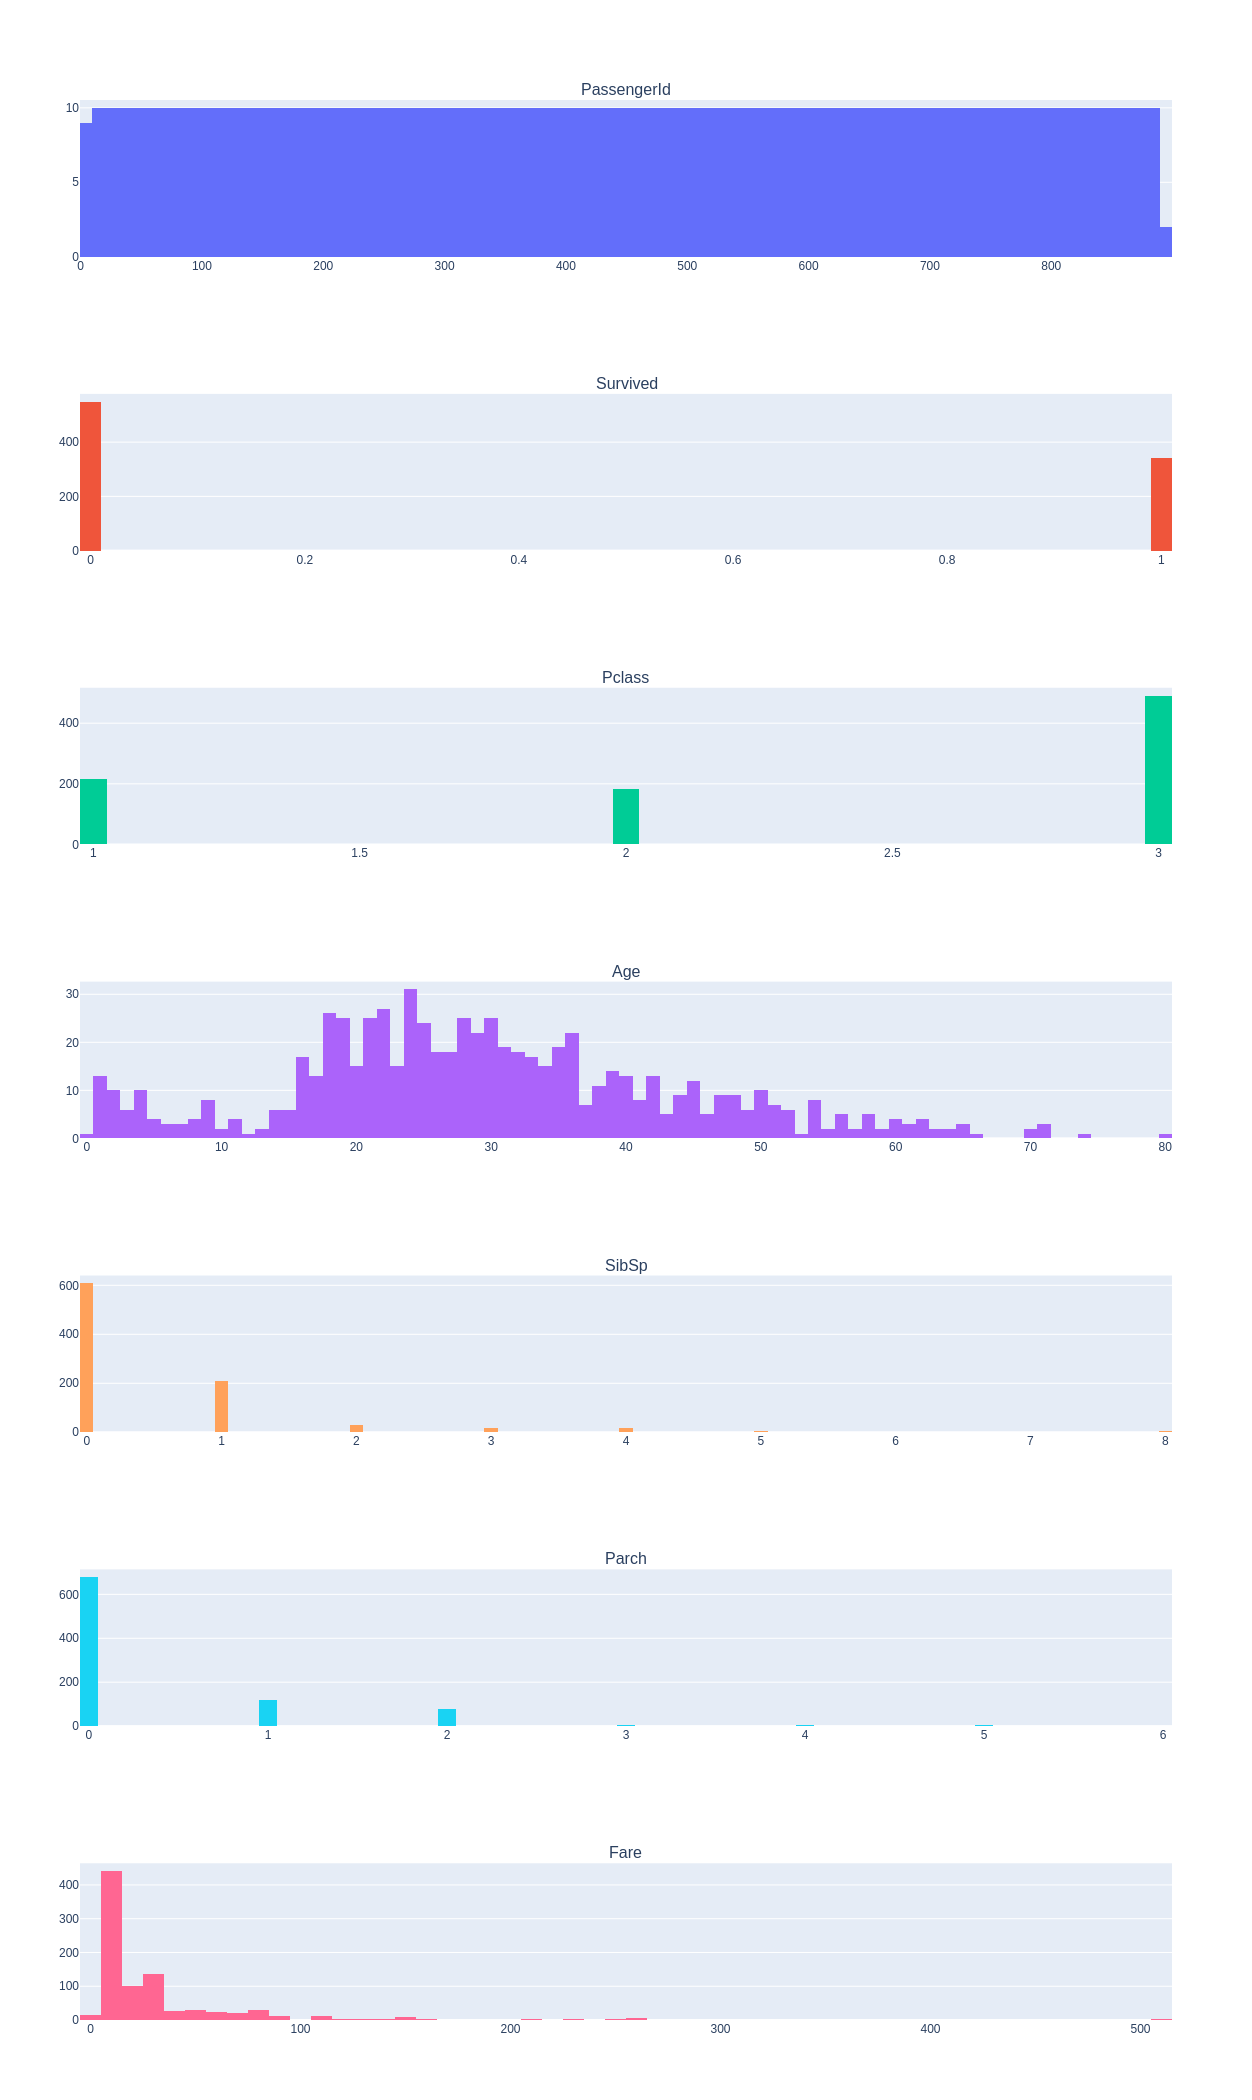

In [49]:
plot_histogram_numerical(df_titanic)